In [5]:
import kaggle

# Authenticate with existing kaggle.json
kaggle.api.authenticate()

# Download dataset (AUTO UNZIP)
kaggle.api.dataset_download_files(
    dataset="louise2001/quantum-physics-articles-on-arxiv-1994-to-2009",
    path="./data",
    unzip=True
)

print("Dataset downloaded and extracted into ./data")


Dataset URL: https://www.kaggle.com/datasets/louise2001/quantum-physics-articles-on-arxiv-1994-to-2009
Dataset downloaded and extracted into ./data


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Find CSV automatically
files = os.listdir("./data")
csv_file = [f for f in files if f.endswith(".csv")][0]

df = pd.read_csv(f"./data/{csv_file}")
df.head()


,title,abstract,categories,created,id,doi
0,"General System theory, Like-Quantum Semantics ...",It is outlined the possibility to extend the q...,"['physics.gen-ph', 'quant-ph']",2007-03-31,0704.0042,NaN
1,Entanglement of Subspaces and Error Correcting...,We introduce the notion of entanglement of sub...,['quant-ph'],2007-04-02,0704.0251,10.1103/PhysRevA.76.042309
2,General sequential quantum cloning,Some multipartite quantum states can be genera...,['quant-ph'],2007-04-03,0704.0323,10.1088/1751-8113/41/15/155303
3,Levy-Lieb constrained-search formulation as a ...,The constrained-search formulation of Levy and...,['quant-ph'],2007-04-03,0704.0372,10.1088/1751-8113/40/11/013
4,Review: Semiconductor Quantum Light Sources,Lasers and LEDs display a statistical distribu...,['quant-ph'],2007-04-03,0704.0403,10.1038/nphoton.2007.46


In [11]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72881 entries, 0 to 72880
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       72881 non-null  object
 1   abstract    72881 non-null  object
 2   categories  72881 non-null  object
 3   created     72881 non-null  object
 4   id          72881 non-null  object
 5   doi         51830 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB


,title,abstract,categories,created,id,doi
count,72881,72881,72881,72881,72881,51830
unique,72849,72855,4174,6839,72881,51735
top,Low temperature acoustic polaron localization,This paper has been withdrawn.,['quant-ph'],2018-12-20,0704.0042,10.26421/QIC17.13-14
freq,2,4,31815,53,1,4


In [12]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df.head()


,title,abstract,categories,created,id,doi
0,"General System theory, Like-Quantum Semantics ...",It is outlined the possibility to extend the q...,"['physics.gen-ph', 'quant-ph']",2007-03-31,0704.0042,NaN
1,Entanglement of Subspaces and Error Correcting...,We introduce the notion of entanglement of sub...,['quant-ph'],2007-04-02,0704.0251,10.1103/PhysRevA.76.042309
2,General sequential quantum cloning,Some multipartite quantum states can be genera...,['quant-ph'],2007-04-03,0704.0323,10.1088/1751-8113/41/15/155303
3,Levy-Lieb constrained-search formulation as a ...,The constrained-search formulation of Levy and...,['quant-ph'],2007-04-03,0704.0372,10.1088/1751-8113/40/11/013
4,Review: Semiconductor Quantum Light Sources,Lasers and LEDs display a statistical distribu...,['quant-ph'],2007-04-03,0704.0403,10.1038/nphoton.2007.46


In [13]:
df.isna().sum()


title             0
abstract          0
categories        0
created           0
id                0
doi           21051
dtype: int64

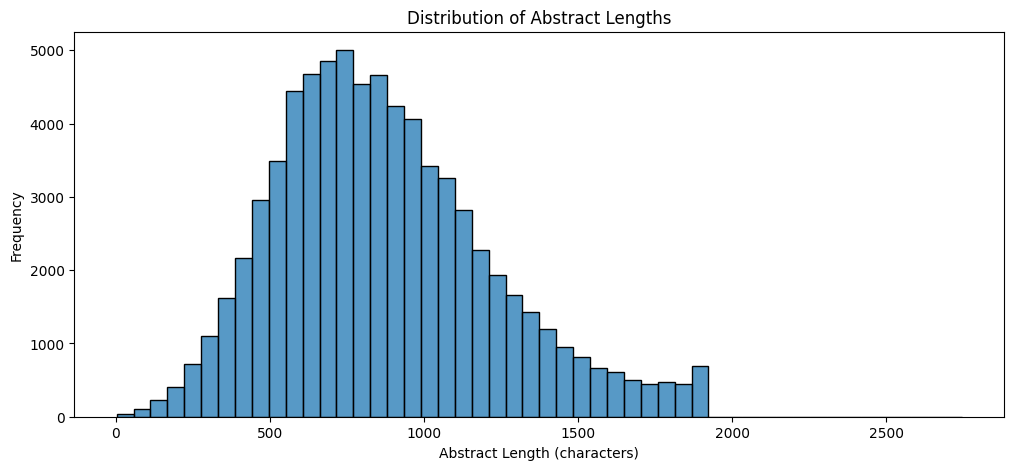

In [19]:
plt.figure(figsize=(12,5))
sns.histplot(df["abstract_length"], bins=50)
plt.title("Distribution of Abstract Lengths")
plt.xlabel("Abstract Length (characters)")
plt.ylabel("Frequency")
plt.show()


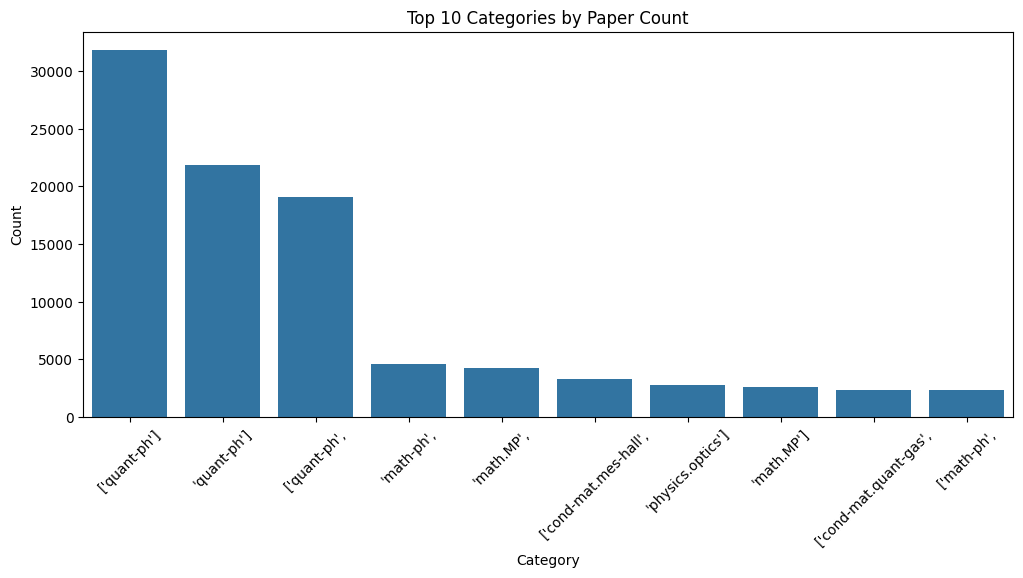

In [21]:
top_cats = df["categories"].str.split(" ").explode().value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_cats.index, y=top_cats.values)
plt.xticks(rotation=45)
plt.title("Top 10 Categories by Paper Count")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


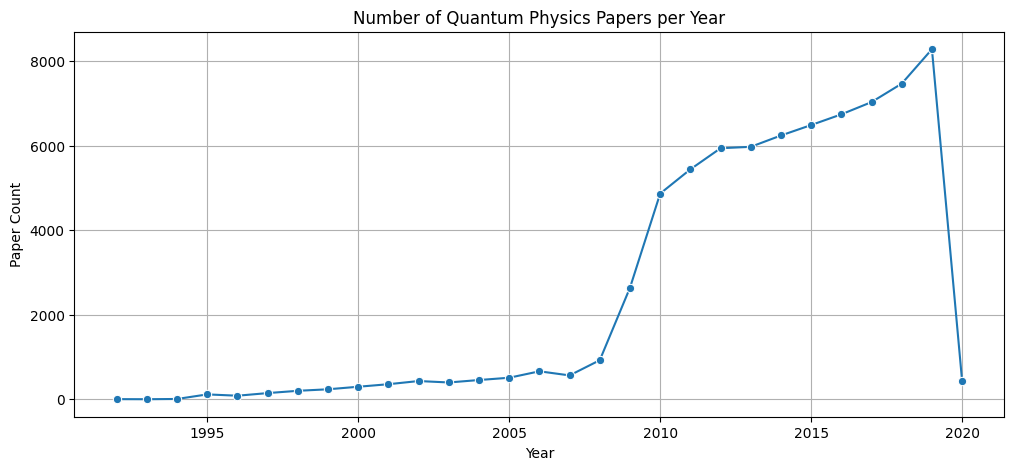

In [22]:
# FORCE-convert "created" to datetime
df["created"] = pd.to_datetime(df["created"], errors="coerce")

# Extract year
df["year"] = df["created"].dt.year

# Plot
year_counts = df["year"].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
plt.title("Number of Quantum Physics Papers per Year")
plt.xlabel("Year")
plt.ylabel("Paper Count")
plt.grid(True)
plt.show()


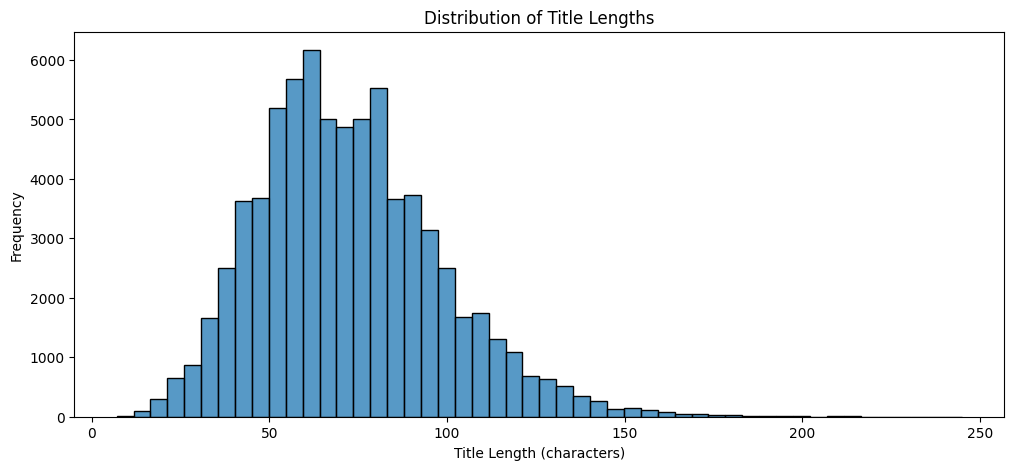

In [23]:
df["title_length"] = df["title"].str.len()

plt.figure(figsize=(12,5))
sns.histplot(df["title_length"], bins=50)
plt.title("Distribution of Title Lengths")
plt.xlabel("Title Length (characters)")
plt.ylabel("Frequency")
plt.show()


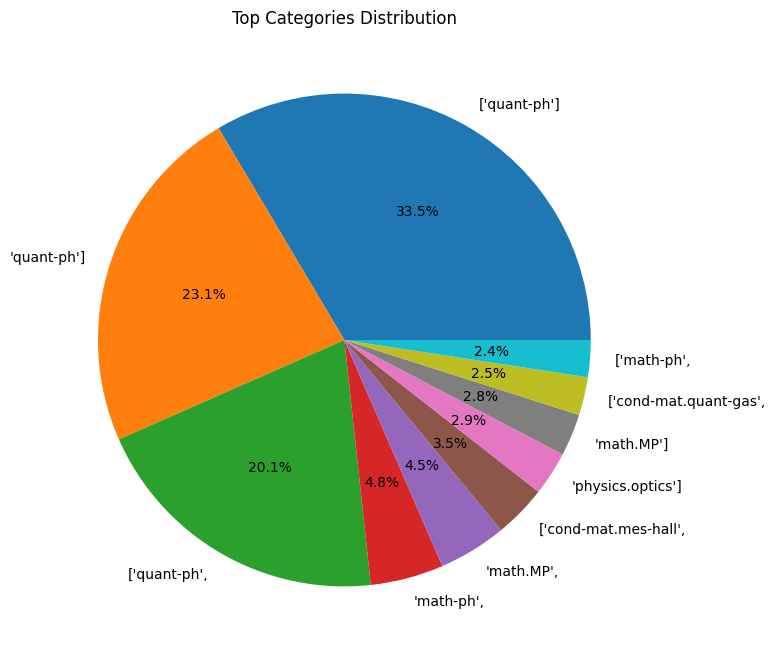

In [24]:
plt.figure(figsize=(8,8))
df["categories"].str.split(" ").explode().value_counts().head(10).plot.pie(autopct="%1.1f%%")
plt.title("Top Categories Distribution")
plt.ylabel("")
plt.show()


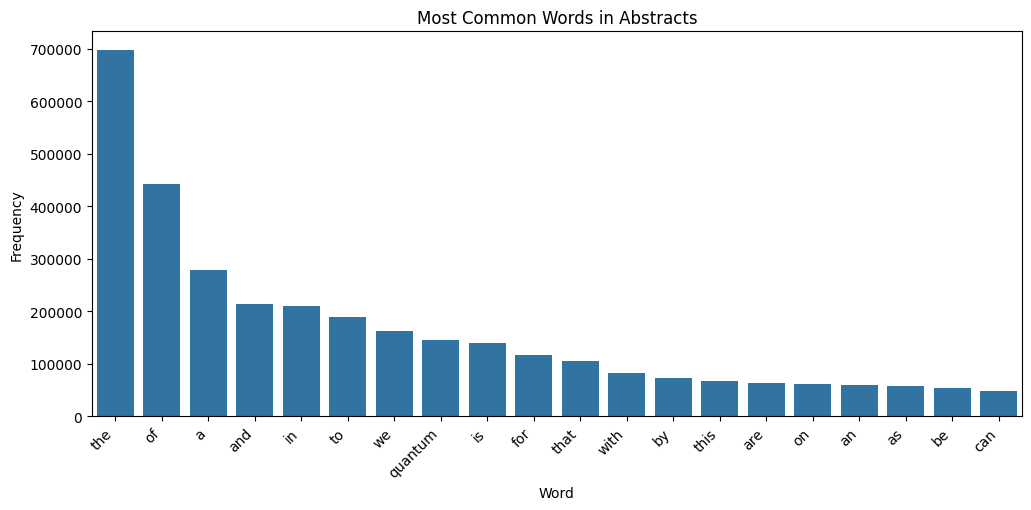

,Word,Frequency
0,the,697926
1,of,442725
2,a,278360
3,and,214921
4,in,211146
5,to,189776
6,we,162939
7,quantum,146468
8,is,138911
9,for,117684


In [26]:
import re
from collections import Counter

text = " ".join(df["abstract"].dropna()).lower()
words = re.findall(r"[a-zA-Z]+", text)

word_counts = Counter(words)

word_df = pd.DataFrame(word_counts.most_common(20), columns=["Word", "Frequency"])

plt.figure(figsize=(12,5))
sns.barplot(data=word_df, x="Word", y="Frequency")
plt.xticks(rotation=45, ha='right')
plt.title("Most Common Words in Abstracts")
plt.show()

word_df
